In [1]:
import numpy as np
import pandas as pd

#from gym import *

In [3]:
def softmax(values, beta):
    """Compute softmax values for each sets of scores in x.
    
    Parameters
    ----------
    values : array-like
        Values to be softmaxed.
    beta : float
        Inverse temperature parameter.
    """

    sum_vals = np.exp(beta * values).sum()
    return np.array([np.exp(beta * value) / sum_vals for value in values])


class ModifiedRLAgent:
    def __init__(self):
        # constants
        self.N_ARMS = 3
        self.V_SHIFT = (.25 + .7) /2
        self.ALPHA = .1
        self.BETA = 1000

        # last value and action
        self.value = self.V_SHIFT
        self.action = np.random.choice([0, 1, 2])

        self._values = []

    def update_value(self, reward):
        self.value += self.alpha * (reward - self.value)

    def act(self):
        p_shift, p_stay = softmax([self.V_SHIFT, self.value], self.BETA)

        # select action (switch or stay) with probabilities p_shift and p_stay
        if_stay = np.random.choice([False, True], p=[p_shift, p_stay])

        # if stay then stay with current action, otherwise switch to another arm (randomly)
        if if_stay:
            self.action = self.action
        else:
            arms = np.arange(self.n_arms)
            self.action = np.random.choice(arms[arms != self.action]) 

        # save value
        self._values.append(self.value)

        return self.action

In [4]:
env = SimpleBanditTask()
agent = ModifiedRLAgent()

while True:
    action = agent.act()
    reward = env.step(action)
    if reward == -1:
        break
    agent.update_value(reward)


Trial 0: choice = 1, reward = 1, all rewards = 1.0, best arm = 0
Trial 1: choice = 2, reward = 0, all rewards = 1.0, best arm = 0
Trial 2: choice = 0, reward = 1, all rewards = 2.0, best arm = 0
Trial 3: choice = 2, reward = 0, all rewards = 2.0, best arm = 0
Trial 4: choice = 0, reward = 1, all rewards = 3.0, best arm = 0
Trial 5: choice = 2, reward = 1, all rewards = 4.0, best arm = 0
Trial 6: choice = 1, reward = 0, all rewards = 4.0, best arm = 0
Trial 7: choice = 0, reward = 1, all rewards = 5.0, best arm = 0
Trial 8: choice = 1, reward = 0, all rewards = 5.0, best arm = 0
Trial 9: choice = 0, reward = 1, all rewards = 6.0, best arm = 0
Trial 10: choice = 2, reward = 0, all rewards = 6.0, best arm = 0
Trial 11: choice = 0, reward = 1, all rewards = 7.0, best arm = 0
Trial 12: choice = 2, reward = 0, all rewards = 7.0, best arm = 0
Trial 13: choice = 1, reward = 0, all rewards = 7.0, best arm = 0
Trial 14: choice = 2, reward = 0, all rewards = 7.0, best arm = 0
Trial 15: choice = 1

In [5]:
df = env.extract_info()

values = np.array(agent.values)
df['values'] = values

df

,trial_id,choice,reward,best_arm,block_id,target,feedback,best_target,values
0,0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.000000
1,1,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.100000
2,2,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.090000
3,3,NaN,NaN,NaN,0.0,2.0,0.0,0.0,0.181000
4,4,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.162900
...,...,...,...,...,...,...,...,...,...
395,395,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.333355
396,396,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.300019
397,397,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.370017
398,398,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.333016


In [6]:
path = '/Users/zsombi/OneDrive/PoPy'
# add to python path for import
import sys
sys.path.append(path)
# import
from popy import plotting_tools as pt

In [7]:
# get current date as string
import datetime
now = datetime.datetime.now()
now = now.strftime("%Y-%m-%d")


AttributeError: 'Axes' object has no attribute 'reshape'

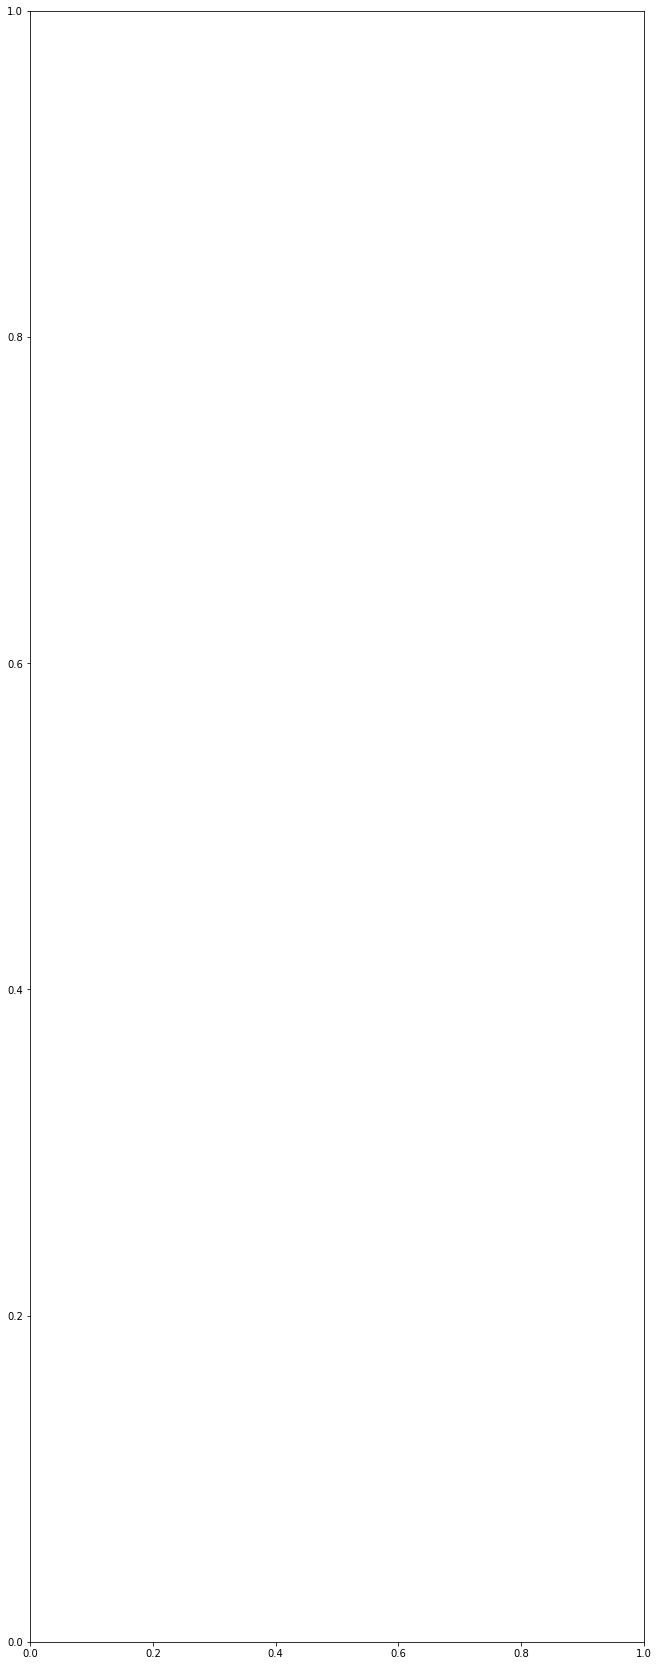

In [8]:
pt.show_target_selection(df, 'agent', now)

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(11, 30))

for i, ax in enumerate(axs.reshape(-1)):
    ax.plot(np.arange(0, 100, 1), np.random.randn(100))
    ax.set_title(f'Plot {i+1}')
